In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('multiple_linear_regression_dataset.csv')

## Check Data

In [3]:
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [5]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


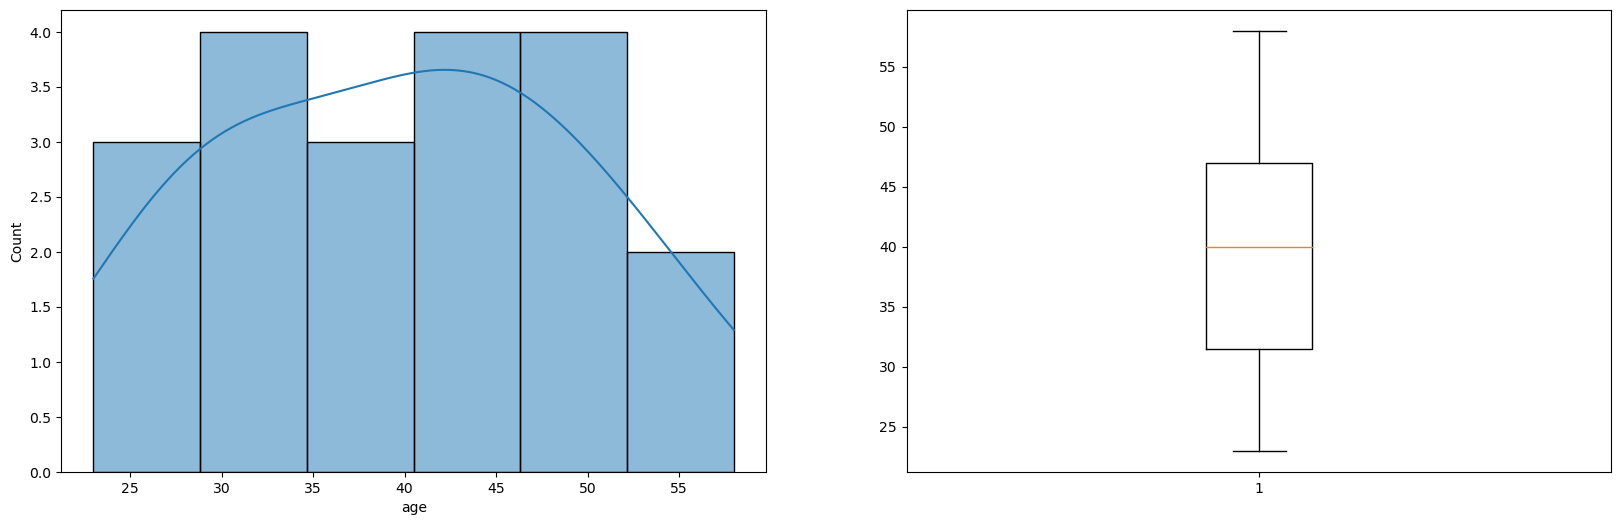

Age Skew: 0.048132759315361026


In [6]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df,x='age',kde=True,ax=axs[0])
axs[1].boxplot(data=df,x='age')
plt.show()

print('Age Skew:',df['age'].skew())

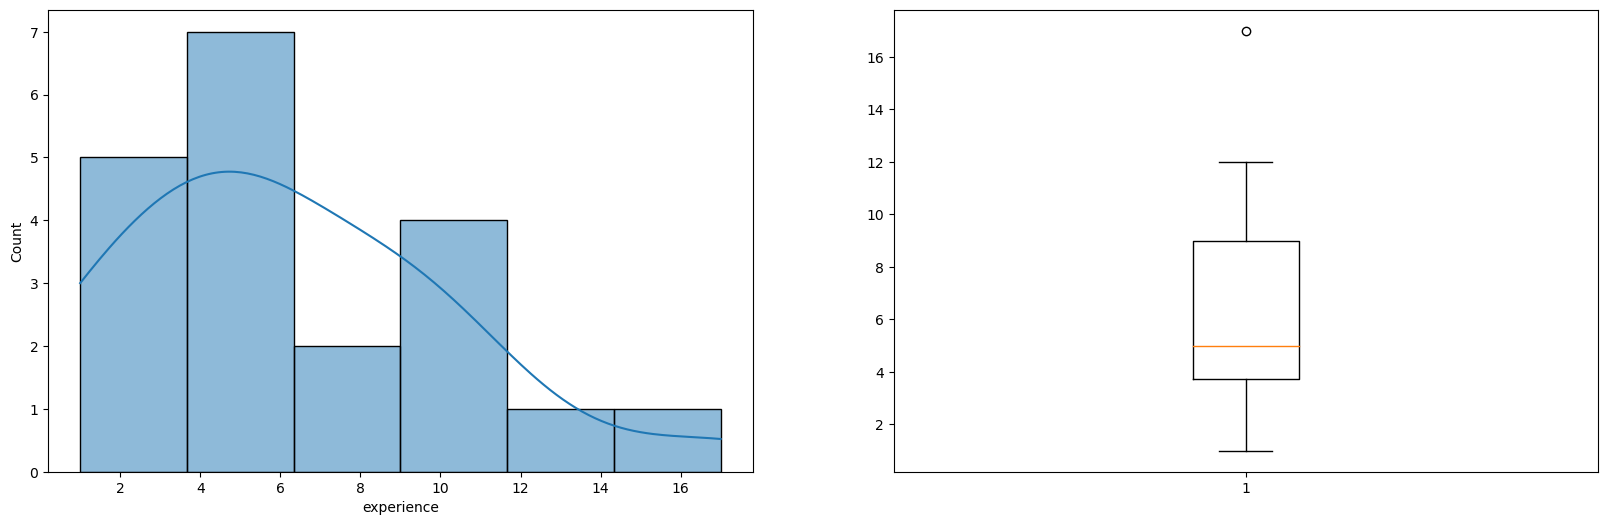

Years Experience Skew: 0.8818202962022678


In [7]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df,x='experience',kde=True,ax=axs[0])
axs[1].boxplot(data=df,x='experience')
plt.show()

print('Years Experience Skew:',df['experience'].skew())


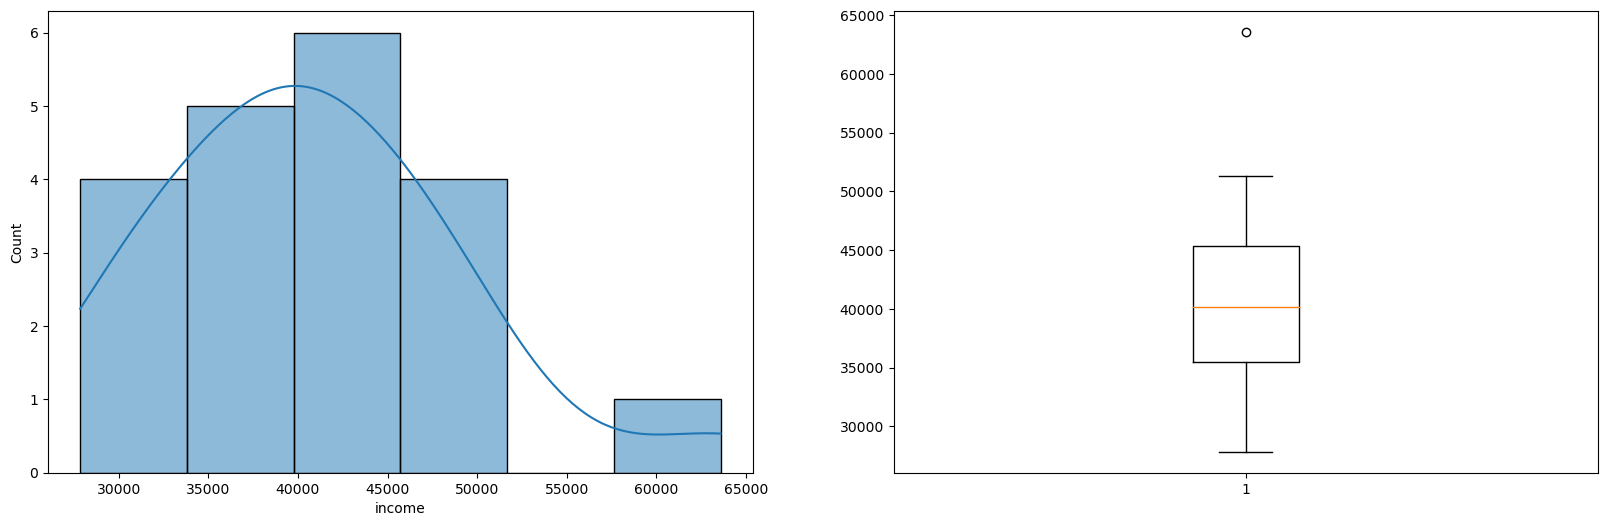

Income Skew: 0.8636321860537339


In [8]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df,x='income',kde=True,ax=axs[0])
axs[1].boxplot(data=df,x='income')
plt.show()

print('Income Skew:',df['income'].skew())


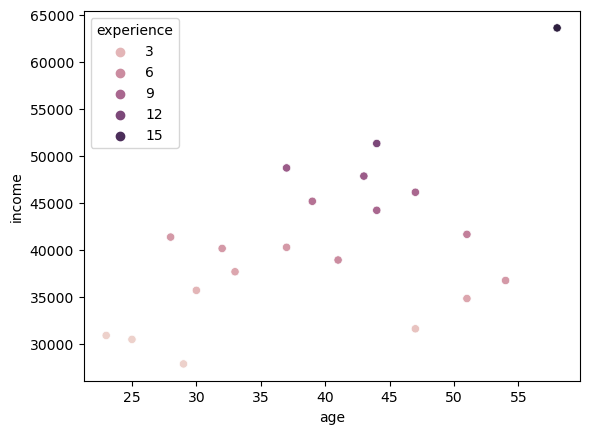

In [9]:
sns.scatterplot(x='age',y='income',data=df,hue='experience')
plt.show()

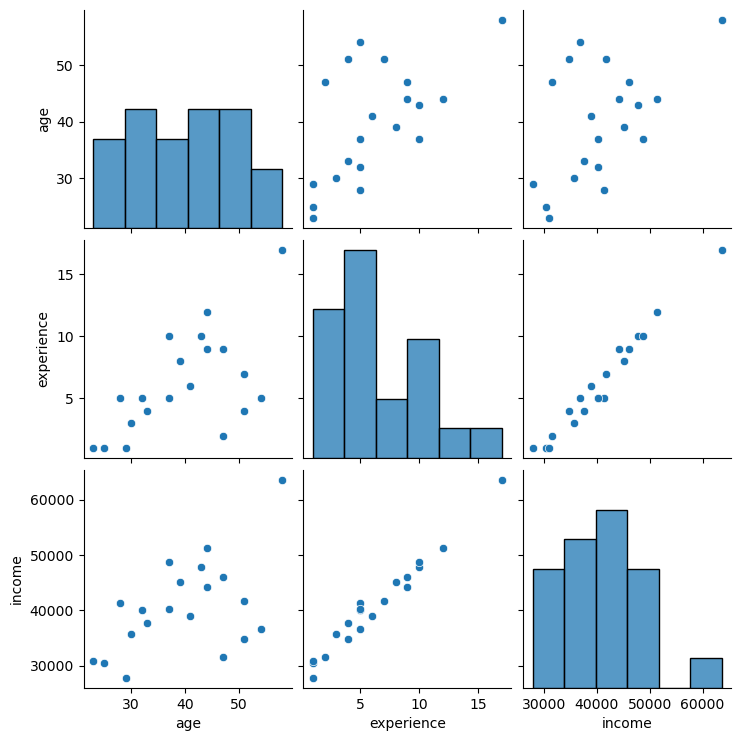

In [10]:
sns.pairplot(data=df)
plt.show()

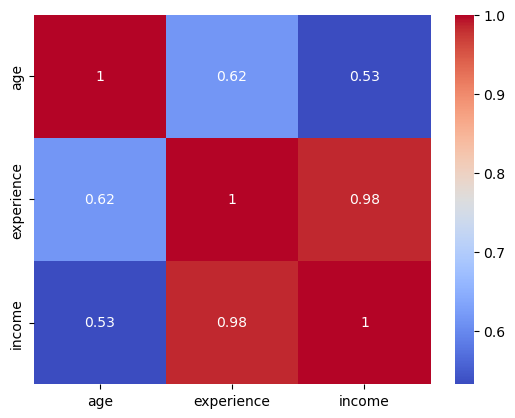

In [11]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

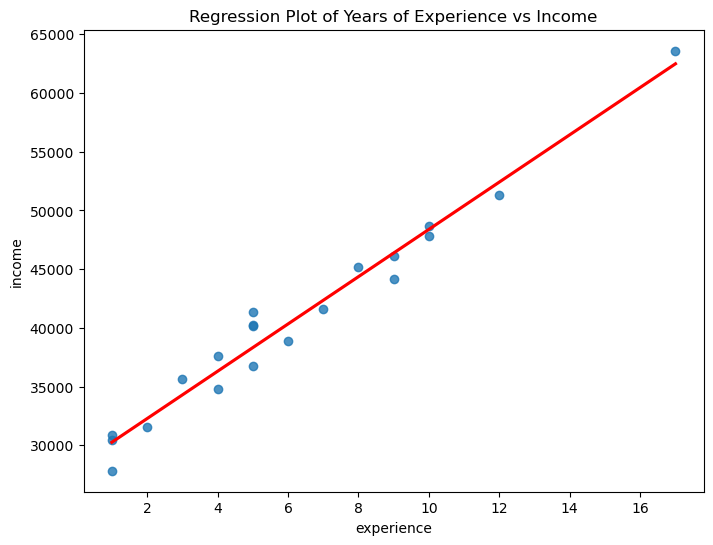

In [12]:
plt.figure(figsize=(8, 6))
sns.regplot(x='experience', y='income', data=df, ci=None, line_kws={"color": "red"})
plt.title('Regression Plot of Years of Experience vs Income')
plt.show()

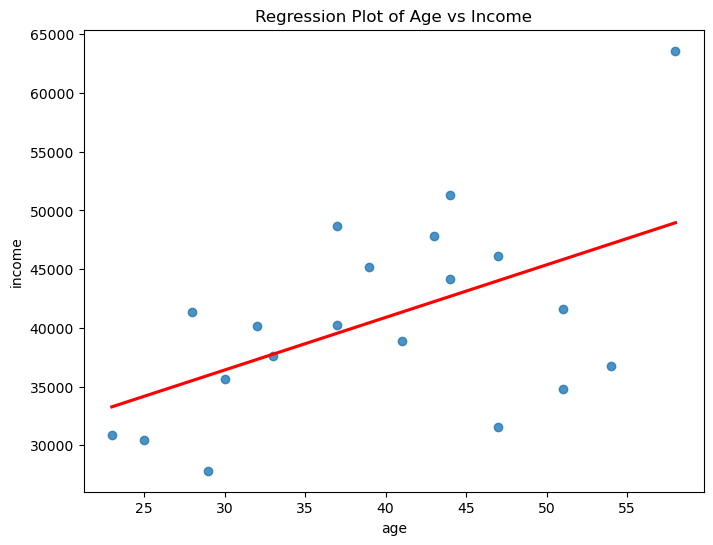

In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='income', data=df, ci=None, line_kws={"color": "red"})
plt.title('Regression Plot of Age vs Income')
plt.show()

## Insights

●There is a positive relation between age and income

●There is a positive relation between experience and income

●There is a strong positive relation between experience and income

●Small outliers in Income and Years Expereice columns

## Modeling

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [15]:
X = df[['age','experience']]
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [17]:
model.intercept_

31465.056418503937

In [18]:
model.coef_

array([-101.0592335 , 2154.80549277])

In [19]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

final=[]
final.append({
        "MAE": mae,
        "MSE":mse,
        "RMSE":rmse,
        "R² Score": r2
    })

finalresult = pd.DataFrame(final)
finalresult

,MAE,MSE,RMSE,R² Score
0,797.911381,753796.769373,868.214702,0.93871


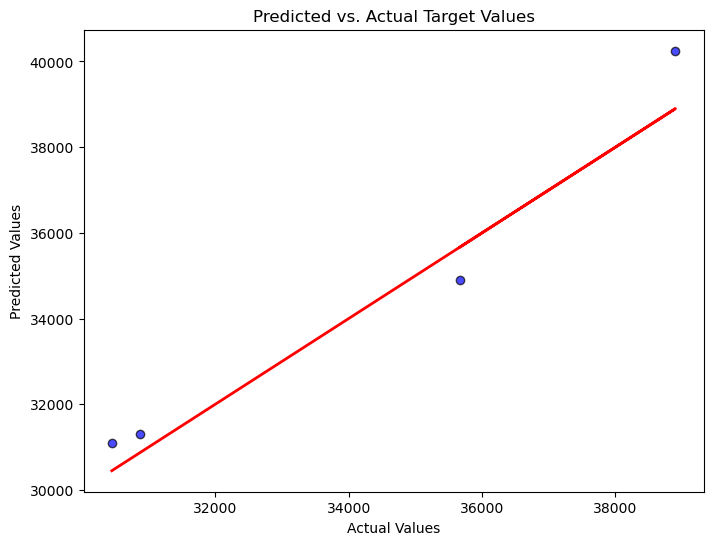

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot(y_test,y_test , color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Target Values')
plt.show()


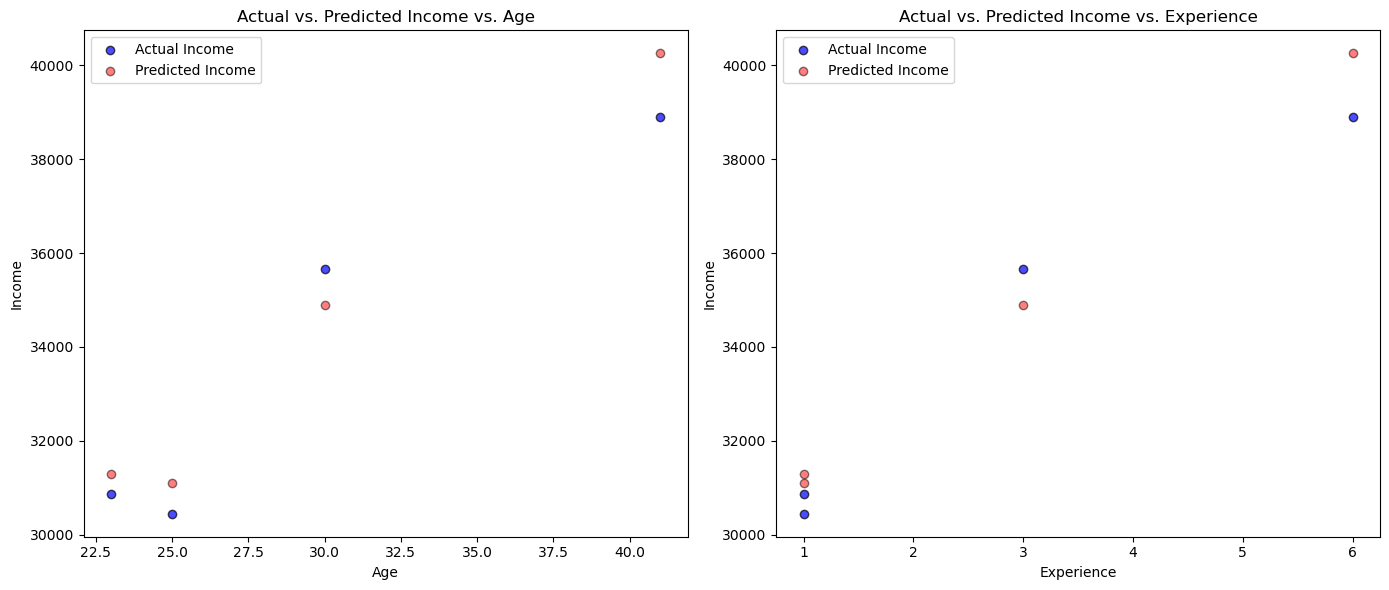

In [22]:
# Plot Actual vs. Predicted Income vs. Age
plt.figure(figsize=(14, 6))

# First subplot: Age vs Income
plt.subplot(1, 2, 1)
plt.scatter(X_test['age'], y_test, color='blue', edgecolor='k', alpha=0.7, label='Actual Income')
plt.scatter(X_test['age'], y_pred, color='red', edgecolor='k', alpha=0.5, label='Predicted Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Actual vs. Predicted Income vs. Age')
plt.legend()

# Second subplot: Experience vs Income
plt.subplot(1, 2, 2)
plt.scatter(X_test['experience'], y_test, color='blue', edgecolor='k', alpha=0.7, label='Actual Income')
plt.scatter(X_test['experience'], y_pred, color='red', edgecolor='k', alpha=0.5, label='Predicted Income')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.title('Actual vs. Predicted Income vs. Experience')
plt.legend()

plt.tight_layout()
plt.show()


## Summary

 The model is likely robust and useful for predicting income based on the provided features and demonstrates strong performance with a low MAE and a high R². The high R² suggests that the model is effective at capturing the relationship between the features (Years, Experience, Age) and the target variable (Income).